In [22]:
import requests
import pandas as pd
import plotly.plotly as py
from plotly.graph_objs import *

import networkx as nx
import numpy as np
import tqdm
import matplotlib.pyplot as plt
import math
from collections import Counter
from scipy.stats import chisquare

In [2]:
df = pd.read_csv('edges.csv')
G = nx.from_pandas_dataframe(df=df, source='source', target='target')

In [3]:
E, N = G.number_of_edges(), G.number_of_nodes()

# 1 Эрдеш-Реньи

In [45]:
p_max_likehood = G.number_of_edges()/(G.number_of_nodes() * (G.number_of_nodes() - 1 )/2)
p_max_likehood

0.08193375710940114

In [46]:
max_degree = []
betweenes_max = []
betweenes_mean = []
betweenes_median = []

In [47]:
for i in tqdm.tqdm(range(1000)):
    GS = nx.erdos_renyi_graph(N, p_max_likehood)
    max_degree.append(max([GS.degree(n) for n in GS.nodes()]))
    betweenes = np.array(list(nx.betweenness_centrality(GS).values()))
    betweenes_max.append(np.max(betweenes))
    betweenes_mean.append(np.mean(betweenes))
    betweenes_median.append(np.median(betweenes))
    

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [21:23<00:00,  1.22s/it]


67


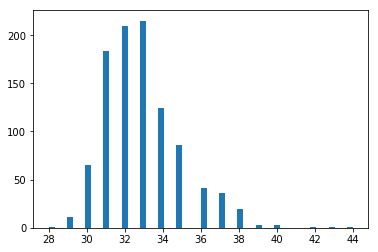

In [48]:
print(max([G.degree(n) for n in G.nodes()]))
plt.hist(max_degree, bins=50)
plt.show()

In [49]:
betweenes = np.array(list(nx.betweenness_centrality(G).values()))

0.0861282052623


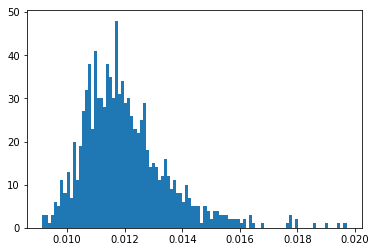

In [50]:
print(np.max(betweenes))
plt.hist(betweenes_max, bins=100)
plt.show()

0.00693599439371


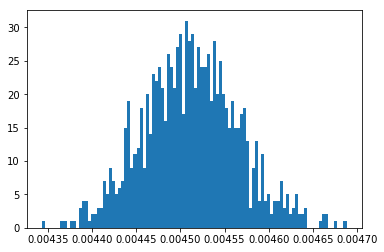

In [51]:
print(np.mean(betweenes))
plt.hist(betweenes_mean, bins=100)
plt.show()

0.00264268722104


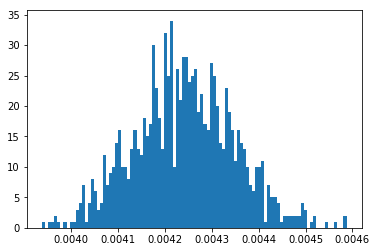

In [52]:
print(np.median(betweenes))
plt.hist(betweenes_median, bins=100)
plt.show()

# Оцените с помощью любого теста соответствие вашего графа степенному распределению.
В предположении, что распределение степенное оцените параметр \gamma (степенной закон p(k)~k^-\gamma, где k -- степень вершины)

In [4]:
degrees = [G.degree(v) for v in G.nodes()]

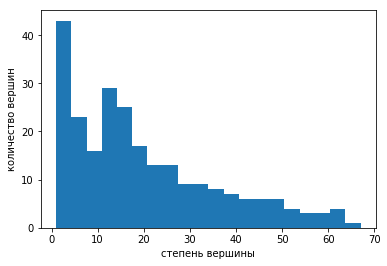

In [15]:
plt.hist(degrees, bins=20)
plt.xlabel('степень вершины')
plt.ylabel('количество вершин')

plt.show()

Оценка параметра гамма:


In [18]:
count = Counter(degrees)
gamma = -np.mean([math.log(count[d]/N)/math.log(d) for d in degrees if count[d] == 1])
gamma

1.5813883404672373

In [20]:
const = np.sum([x** (-gamma) for x in range(1, N)])
const

2.26756649324133

In [33]:
max(degrees)

67

In [44]:
chisquare(pd.Series([count[d] for d in range(1, 67)]), [G.number_of_nodes()/(const * (x**gamma)) for x in range(1, 67)], ddof=1)

Power_divergenceResult(statistic=1012.9046407665305, pvalue=1.0083190464273033e-170)

In [ ]:
То есть распределение не очень степенное

# Барабаси

In [53]:
m = round(G.number_of_edges()/G.number_of_nodes())
m

10

In [54]:
max_degree = []
betweenes_max = []
betweenes_mean = []
betweenes_median = []

In [55]:

for i in tqdm.tqdm(range(1000)):
    GS = nx.barabasi_albert_graph(N,m)
    max_degree.append(max([GS.degree(n) for n in GS.nodes()]))
    betweenes = np.array(list(nx.betweenness_centrality(GS).values()))
    betweenes_max.append(np.max(betweenes))
    betweenes_mean.append(np.mean(betweenes))
    betweenes_median.append(np.median(betweenes))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [20:46<00:00,  1.24s/it]


67


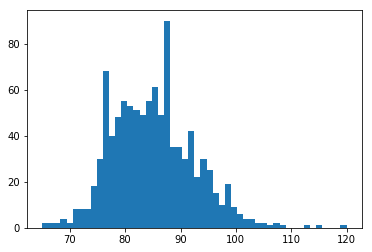

In [56]:
print(max([G.degree(n) for n in G.nodes()]))
plt.hist(max_degree, bins=50)
plt.show()

In [57]:
betweenes = np.array(list(nx.betweenness_centrality(G).values()))

0.0861282052623


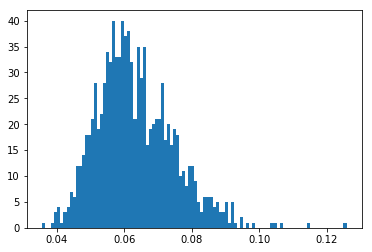

In [58]:
print(np.max(betweenes))
plt.hist(betweenes_max, bins=100)
plt.show()

0.00693599439371


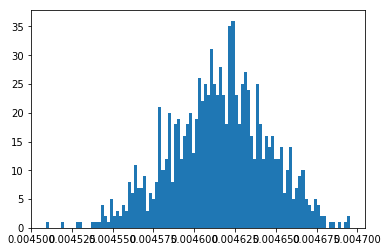

In [59]:
print(np.mean(betweenes))
plt.hist(betweenes_mean, bins=100)
plt.show()

0.00264268722104


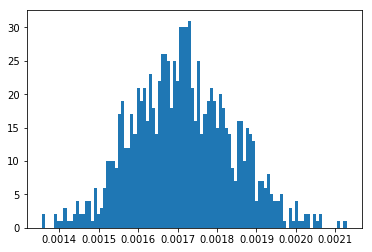

In [60]:
print(np.median(betweenes))
plt.hist(betweenes_median, bins=100)
plt.show()